In [1]:
cd ..

/Users/miguel/Jottacloud/HedgingRL


## Create environment

In [2]:
import json
from os import path
import pandas as pd

import gym.envs
import numpy as np

num_steps = 100
gym.envs.register(id='obs-v2',
                  entry_point='gym_bs.envs:EuropeanOptionEnv',
                  kwargs={'t': num_steps,
                          'n': 1,
                          's0': 49,
                          'k': 50,
                          'max_stock': 1,
                          'vola': .002})

params = dict(n_iter=10000, batch_size=50, elite_frac=0.3)

env = gym.make('obs-v2')
env = gym.wrappers.Monitor(env, "/tmp/gym-results/obs-v2", video_callable=False, write_upon_reset=True, force=True)
 

[2017-08-02 21:51:57,153] Making new env: obs-v2
[2017-08-02 21:51:57,406] Clearing 3 monitor files from previous run (because force=True was provided)


In [3]:
observation = env.reset()

### Random action

In [4]:
%%time
df = pd.DataFrame.from_dict({'reward': [], 'observation': []})
for _ in range(10000):
    observation = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
    df = df.append( pd.DataFrame.from_dict({'reward': reward, 'observation': [observation]}))

KeyboardInterrupt: 

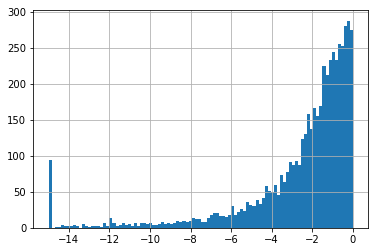

In [9]:
%matplotlib inline
df.reward.clip_lower(-15).hist(bins=100)

### No action

In [ ]:
%%time
df = pd.DataFrame.from_dict({'reward': [], 'underlying': [], 'tau': [], 'stocks': []})
action = np.array([0.])
for _ in range(1000):
    observation = env.reset()
    done = False
    while not done:
#         action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
    df = df.append( pd.DataFrame.from_dict({'reward': reward,
                                            'underlying': observation[0],
                                            'tau': observation[1],
                                            'stocks': observation[2]}))

In [ ]:
%matplotlib inline
df.reward.clip_lower(-1500).hist(bins=10)

In [ ]:
%matplotlib inline
df.underlying.hist(bins=20)

In [ ]:
env.step()

In [ ]:
done = False
df = pd.DataFrame.from_dict({'reward': [], 'observation': []})
while not done:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    df = df.append( pd.DataFrame.from_dict('reward': reward, 'observation': observation))

In [ ]:
reward